## **Predictive Modelling of Customer Churn and Retention Strategies for a Telecommunication Company: An Analysis for Vodafone Corporation**
## BUSINESS UNDERSTANDING

As a leading telecommunication corporation recognizes the criticality of customer retention in sustaining business growth. The escalating issue of customer churn can have a detrimental impact on a company's revenue and profitability, as acquiring new customers is often more costly than retaining existing ones. To address this challenge, this project aims to assist a telecommunication company in analysing customer churn patterns, identifying factors influencing churn, and developing effective customer retention strategies by leveraging machine learning techniques.

The primary objective is to develop robust machine-learning models to predict customer churn accurately. By analysing historical customer data, the aim is to identify key indicators of churn and formulate targeted retention strategies to reduce customer attrition to achieve higher profitability.

This dataset contains different features information such as:

* Gender — Whether the customer is a male or a female

* SeniorCitizen — Whether a customer is a senior citizen or not

* Partner — Whether the customer has a partner or not (Yes, No)

* Dependents — Whether the customer has dependents or not (Yes, No)

* Tenure — Number of months the customer has stayed with the company

* Phone Service — Whether the customer has a phone service or not (Yes, No)

* MultipleLines — Whether the customer has multiple lines  

* InternetService — Customer’s internet service provider (DSL, Fiber Optic, No)

* OnlineSecurity — Whether the customer has online security or not (Yes, No, No Internet)

* OnlineBackup — Whether the customer has online backup or not (Yes, No, No Internet)

* DeviceProtection — Whether the customer has device protection or not (Yes, No, No internet service)

* TechSupport — Whether the customer has tech support or not (Yes, No, No internet)

* StreamingTV — Whether the customer has streaming TV or not (Yes, No, No internet service)

* StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet service)

* Contract — The contract term of the customer (Month-to-Month, One year, Two year)

* PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)

* Payment Method — The customer’s payment method (Electronic check, mailed check, Bank transfer(automatic), Credit 
card(automatic))

* MonthlyCharges — The amount charged to the customer monthly

* TotalCharges — The total amount charged to the customer

* Churn — Whether the customer churned or not (Yes or No)

##             HYPOTHESIS

* Null Hypothesis (H0): There is no significant difference in churn rates between customers with longer contract terms and those using the payment method (Automatic).

* Alternative Hypothesis (H1): There is a significant difference in churn rates between customers with longer contract terms and those using the payment method (Automatic).

## QUESTIONS

 
1. How do contract terms and payment methods correlate with customer churn?

2. Are there specific services that significantly impact churn rates?

3. Are there specific services that customers with longer contract terms tend to use more frequently?

4. Do customers using automatic payment methods show different churn patterns compared to other payment methods?

5. Are senior citizens more or less likely to churn compared to non senior citizens?





## DATA UNDERSTANDING
## Importation

In [148]:
#install openpyxl to be able to open excel files in python
#%pip install openpyxl
#%pip install -U imbalanced-learn
#%pip install pandas
#%pip install numpy
#%pip install dotenv
#%pip install matplotlib
#%pip install seaborn
#%pip install plotly

In [149]:
%pip install python-dotenv


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [150]:
# Import necessary libraries for data handling 
import pyodbc
import pandas as pd
import numpy as np
from dotenv import dotenv_values

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 

# hypothesis testing
from scipy.stats import chi2_contingency

# Machine learning classification model from sklean
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Feature Processing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.base import TransformerMixin
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from functools import partial
from sklearn.metrics import roc_curve, auc

# class imbalance
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.pipeline import Pipeline as impipeline

# Hyperparameters Fine-tuning
from sklearn.model_selection import GridSearchCV

# Other utilities
import joblib
import os
import pickle





## Data Loading
#### **Training Set_1 (SQL)**

In [151]:
# Load environment variables from .env file into a dictionary
environment_variables=dotenv_values('.env')

# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("DATABASE")
server = environment_variables.get("SERVER")
username = environment_variables.get("USERNAME")
password = environment_variables.get("PASSWORD")

#code for connection 
connection_string=f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"



In [152]:
connection = pyodbc.connect(connection_string)

In [153]:
query = 'SELECT * FROM dbo.LP2_Telco_churn_first_3000'

data1 = pd.read_sql(query,connection)
data1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True



#### **Training Set_2 (CSV)**

In [154]:
# Checking the column headers for Data1
data1.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [155]:
df = data1

#reset index of the conc dataset
df = df.reset_index(drop=True)
df = pd.DataFrame(df)

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2209-XADXF,Female,False,False,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,False,Bank transfer (automatic),25.250000,25.250000,False
2996,6620-JDYNW,Female,False,False,False,18,True,True,DSL,True,...,True,False,False,False,Month-to-month,True,Mailed check,60.599998,1156.349976,False
2997,1891-FZYSA,Male,True,True,False,69,True,True,Fiber optic,False,...,False,False,True,False,Month-to-month,True,Electronic check,89.949997,6143.149902,True
2998,4770-UEZOX,Male,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,74.750000,144.800003,False


* INSIGHTS: The Variables; 'Churn', 'PaperlessBilling', 'StreamingMovies','StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines', 'PhoneService', 'Dependents' and 'Partner' have inconsistent enteries (Yes, No, False and True)

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


* INSIGHTS: The above (.info()) shows that:
 
Categorical variable: SeniorCitizen column is of datatype int64.
Numeric variable: TotalCharges column is of datatype object.

The variables: MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection,
TechSupport, StreamingTV, StreamingMovies, TotalCharges and Churn have missing values.
 


In [157]:
# Change the datatype of the variable 'TotalCharges' to a float
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Verify Changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        3000 non-null   object 
 1   gender            3000 non-null   object 
 2   SeniorCitizen     3000 non-null   bool   
 3   Partner           3000 non-null   bool   
 4   Dependents        3000 non-null   bool   
 5   tenure            3000 non-null   int64  
 6   PhoneService      3000 non-null   bool   
 7   MultipleLines     2731 non-null   object 
 8   InternetService   3000 non-null   object 
 9   OnlineSecurity    2349 non-null   object 
 10  OnlineBackup      2349 non-null   object 
 11  DeviceProtection  2349 non-null   object 
 12  TechSupport       2349 non-null   object 
 13  StreamingTV       2349 non-null   object 
 14  StreamingMovies   2349 non-null   object 
 15  Contract          3000 non-null   object 
 16  PaperlessBilling  3000 non-null   bool   


In [158]:
# Standardizing the enteries in specific columns 
# list out the columns with inconsistent enteries
boolean_columns = ['Churn', 'PaperlessBilling', 'StreamingMovies','StreamingTV', 'TechSupport', 'DeviceProtection', 'OnlineBackup', 'OnlineSecurity', 'MultipleLines', 'PhoneService', 'Dependents', 'Partner']

# Iterate through each column and replace True/False with 'Yes'/'No'
for column in boolean_columns:
    df[column] = df[column].replace({True: 'Yes', False: 'No'})

# drop unneeded column
columns_drop = ['customerID']
df = df.drop(columns=columns_drop)

# Verify changes
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,False,Yes,No,1,No,None,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850000,29.850000,No
1,Male,False,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950001,1889.500000,No
2,Male,False,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.849998,108.150002,Yes
3,Male,False,No,No,45,No,None,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.299999,1840.750000,No
4,Female,False,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.699997,151.649994,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Female,False,No,No,1,No,None,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),25.250000,25.250000,No
2996,Female,False,No,No,18,Yes,Yes,DSL,Yes,No,Yes,No,No,No,Month-to-month,Yes,Mailed check,60.599998,1156.349976,No
2997,Male,True,Yes,No,69,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.949997,6143.149902,Yes
2998,Male,False,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.750000,144.800003,No


In [159]:
# check for duplicates
dup = df.duplicated().sum()
print(f'This dataset has',dup,'duplicates')

This dataset has 7 duplicates


In [160]:
# Drop duplicates
df = df.drop_duplicates()

# reset the index
df = df.reset_index(drop=True)

# Verify Changes
ver = df.duplicated().sum()
print(f'This dataset has',ver,'duplicates')

This dataset has 0 duplicates


In [161]:
# check null values
df.isnull().sum()

gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      646
OnlineBackup        646
DeviceProtection    646
TechSupport         646
StreamingTV         646
StreamingMovies     646
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 1
dtype: int64

In [162]:
# Check the percentage of missing values
(df.isnull().sum()/(len(df)))*100

gender               0.000000
SeniorCitizen        0.000000
Partner              0.000000
Dependents           0.000000
tenure               0.000000
PhoneService         0.000000
MultipleLines        8.987638
InternetService      0.000000
OnlineSecurity      21.583695
OnlineBackup        21.583695
DeviceProtection    21.583695
TechSupport         21.583695
StreamingTV         21.583695
StreamingMovies     21.583695
Contract             0.000000
PaperlessBilling     0.000000
PaymentMethod        0.000000
MonthlyCharges       0.000000
TotalCharges         0.167056
Churn                0.033411
dtype: float64

In [163]:
# veiwing the type of null values 
selected_columns = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'TotalCharges', 'Churn']
df_selected = df[selected_columns]
df_selected


,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,TotalCharges,Churn
0,None,No,Yes,No,No,No,No,29.850000,No
1,No,Yes,No,Yes,No,No,No,1889.500000,No
2,No,Yes,Yes,No,No,No,No,108.150002,Yes
3,None,Yes,No,Yes,Yes,No,No,1840.750000,No
4,No,No,No,No,No,No,No,151.649994,Yes
...,...,...,...,...,...,...,...,...,...
2988,None,No,No,No,No,No,No,25.250000,No
2989,Yes,Yes,No,Yes,No,No,No,1156.349976,No
2990,Yes,No,Yes,No,No,Yes,No,6143.149902,Yes
2991,No,No,Yes,No,No,No,No,144.800003,No


In [164]:
# View the unique enteries in the selected columns
print("Unique values in 'Churn' column:")
print(df_selected['Churn'].unique())

print("\nUnique values in 'MultipleLines' column:")
print(df_selected['MultipleLines'].unique())

print("\nUnique values in 'OnlineSecurity' column:")
print(df_selected['OnlineSecurity'].unique())

print("\nUnique values in 'OnlineBackup' column:")
print(df_selected['OnlineBackup'].unique())

print("\nUnique values in 'DeviceProtection' column:")
print(df_selected['DeviceProtection'].unique())

print("\nUnique values in 'TechSupport' column:")
print(df_selected['TechSupport'].unique())

print("\nUnique values in 'StreamingTV' column:")
print(df_selected['StreamingTV'].unique())

print("\nUnique values in 'StreamingMovies' column:")
print(df_selected['StreamingMovies'].unique())

print("\nUnique values in 'StreamingTV' column:")
print(df_selected['StreamingTV'].unique())

Unique values in 'Churn' column:
['No' 'Yes' None]

Unique values in 'MultipleLines' column:
[None 'No' 'Yes']

Unique values in 'OnlineSecurity' column:
['No' 'Yes' None]

Unique values in 'OnlineBackup' column:
['Yes' 'No' None]

Unique values in 'DeviceProtection' column:
['No' 'Yes' None]

Unique values in 'TechSupport' column:
['No' 'Yes' None]

Unique values in 'StreamingTV' column:
['No' 'Yes' None]

Unique values in 'StreamingMovies' column:
['No' 'Yes' None]

Unique values in 'StreamingTV' column:
['No' 'Yes' None]


* INSIGHTS: 
* The percentage of missing values is ~5% for MultipleLines and ~13% for OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV and StreamingMovies. 
* Null values are of the type 'None' and not 'NaN'.

In [165]:
# Replace 'None' with NaN for consistency
df.replace({None: np.nan}, inplace=True)

## EDA

In [166]:
# Getting the summary statistics of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,2993.0,32.601069,24.619278,0.000000,9.000000,29.000000,56.000000,72.000000
MonthlyCharges,2993.0,65.427932,30.113319,18.400000,35.900002,70.949997,90.300003,118.650002
TotalCharges,2988.0,2306.597106,2274.992319,18.799999,417.487495,1410.250000,3879.062439,8564.750000


* INSIGHTS: 
1. **Tenure:**

* The average tenure of customers is around 32.58 months, with a wide range from 0 to 72 months.
* The majority of customers have a tenure below the 75th percentile (56 months), as indicated by the relatively lower median (29 months).

2. **Monthly Charges:**

* The average monthly charge is $65.09, with a standard deviation of $30.07.
* Monthly charges range from $18.40 to $118.65, indicating variability in pricing.
* The median monthly charge is $70.55, which is higher than the mean, suggesting a right-skewed distribution.

3. **Total Charges:**

* The total charges have a wide range, with an average of $2302.06 and a standard deviation of $2269.48.
* Some customers have significantly higher total charges, as indicated by the high maximum value of $8670.10.
* There is a noticeable difference between the median ($1401.15) and mean, suggesting potential skewness or possible outliers.

In [167]:
# Seperating Numerical and categorical variables for easy analysis
cat_cols = df.select_dtypes(include=['object', 'bool']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')
Numerical Variables:
['tenure', 'MonthlyCharges', 'TotalCharges']


### Univariate Analysis

tenure
Skew : 0.23


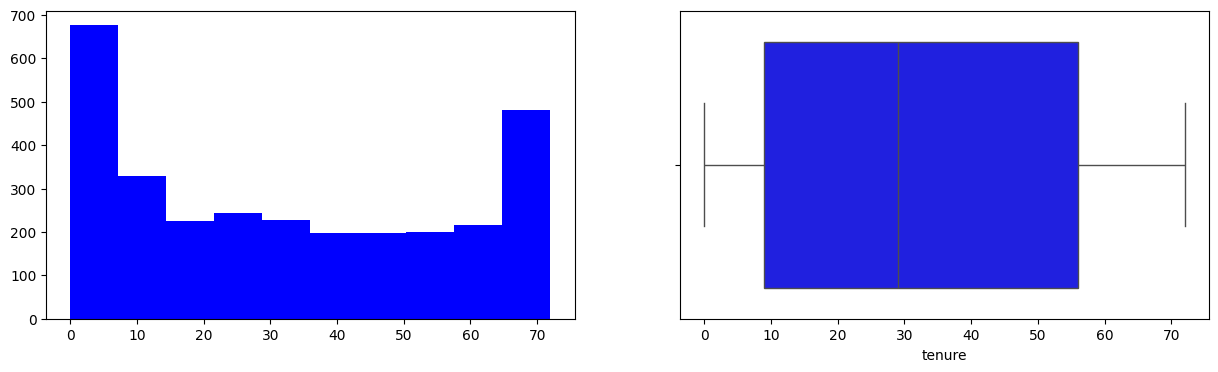

MonthlyCharges
Skew : -0.26


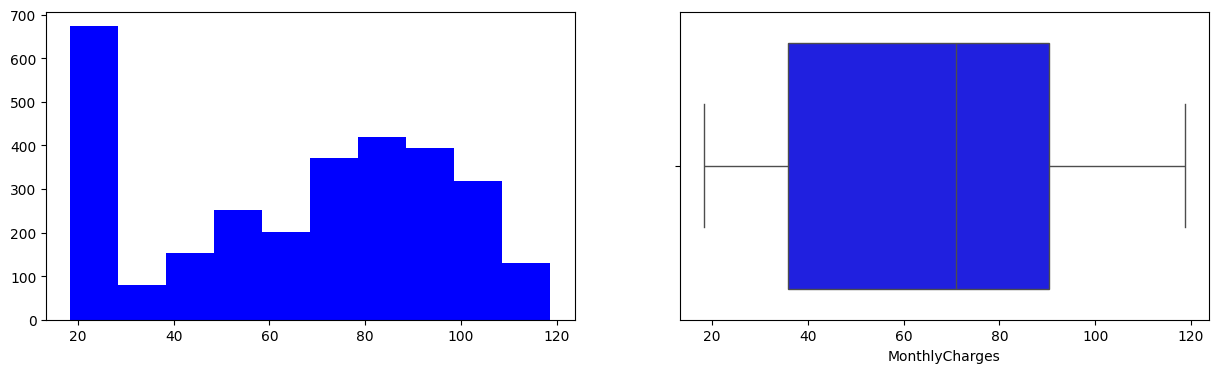

TotalCharges
Skew : 0.94


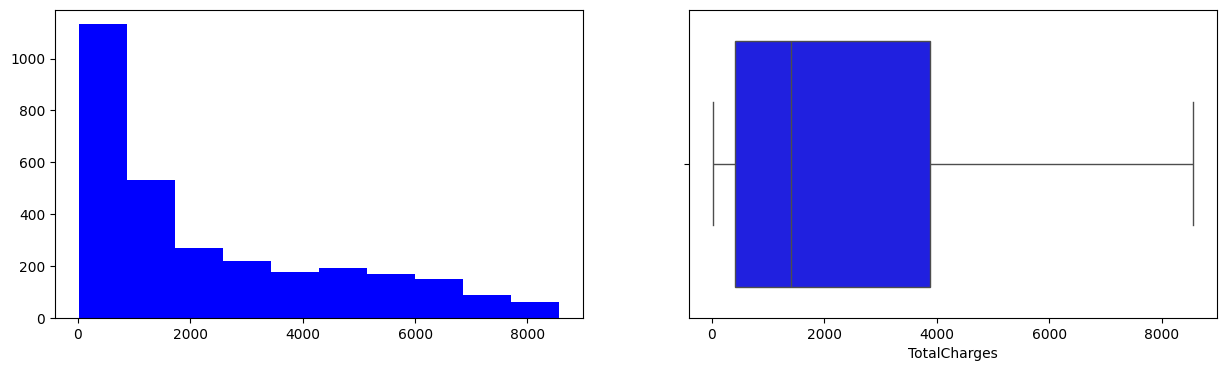

In [168]:
# Visualizing the distribution of the numerical columns using histogram and box plot side by side while printing the skewness
for col in num_cols:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False, color ="blue")
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='blue')
    plt.show()

* INSIGHTS: The visualization reveals the distributions of continuous numerical columns are notably uneven, predominantly exhibiting positive skewness with monthly Charges negatively skewed. This observation suggests that these columns may benefit from transformations to achieve a more balanced distribution, which can positively impact the performance of machine learning models.

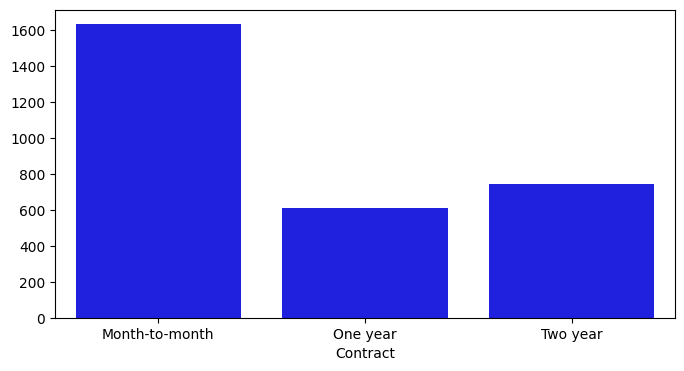

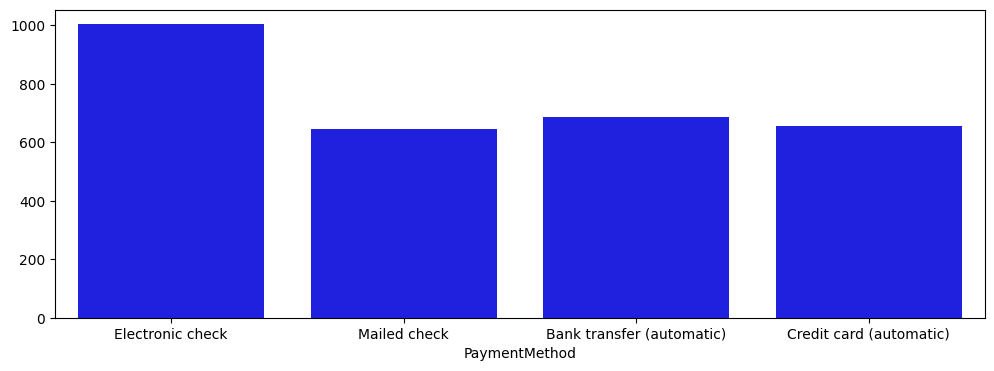

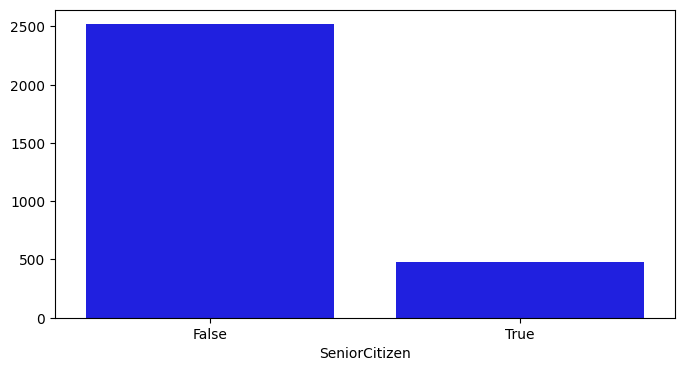

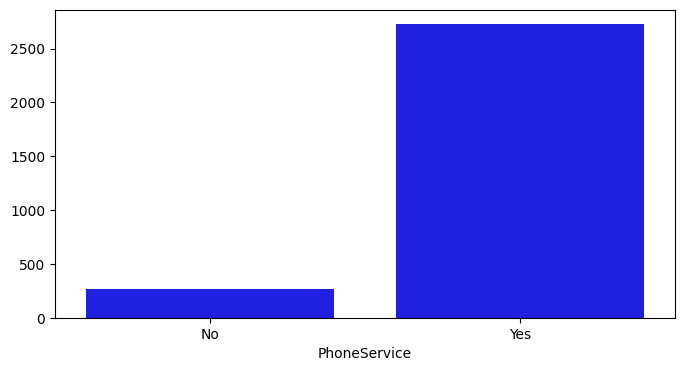

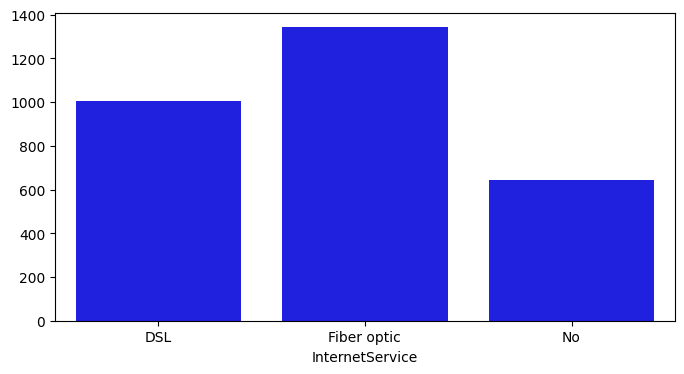

In [169]:
plt.figure(figsize=(8,4))
ax = sns.countplot(data = df, x="Contract",color = "blue")
ax.set(ylabel=None)
plt.show()

plt.figure(figsize=(12,4))
ax = sns.countplot(x ="PaymentMethod", data = df, color = "blue")
ax.set(ylabel=None)
plt.show()

plt.figure(figsize=(8,4))
ax = sns.countplot(x="SeniorCitizen",data= df,color = "blue")
ax.set(ylabel=None)
plt.show()


plt.figure(figsize=(8,4))
ax = sns.countplot(x="PhoneService",data= df,color = "blue")
ax.set(ylabel=None)
plt.show()

plt.figure(figsize=(8,4))
ax = sns.countplot(x="InternetService",data= df,color = "blue")
ax.set(ylabel=None)
plt.show()

* INSIGHT: The visualization reveals skewness in majority of the categories. This imbalance in our key features may adversely impact the quality and predictive accuracy of our model, emphasizing the need for balance to enhance model performance.

### Bi-variate Analysis

In [170]:
# relationship among features
correlation_matrix = df.corr(numeric_only=True)
correlation_matrix

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,-0.015398,0.221801,0.083493
tenure,-0.015398,1.000000,0.227700,0.823823
MonthlyCharges,0.221801,0.227700,1.000000,0.640597
TotalCharges,0.083493,0.823823,0.640597,1.000000


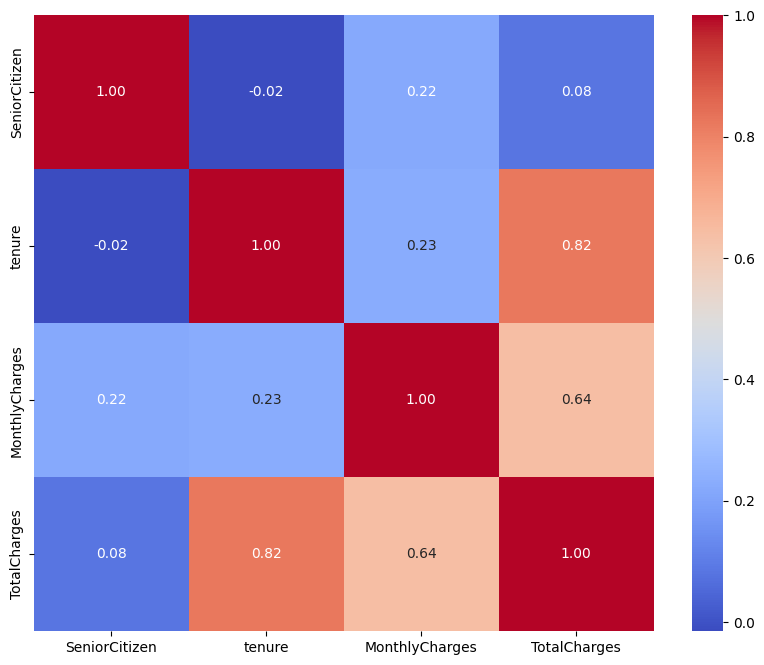

In [171]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* INSIGHTS: The correlation matrix reveals positive correlations between tenure and both monthly and total charges, with a stronger correlation observed between tenure and total charges, while senior citizenship exhibits a modest positive correlation with both monthly and total charges in the dataset

In [172]:
# Create a contingency table 
contingency_table = pd.crosstab(df['Contract'], df['Churn'])
contingency_table 

Churn,No,Yes
Contract,,
Month-to-month,936,698
One year,544,69
Two year,735,10


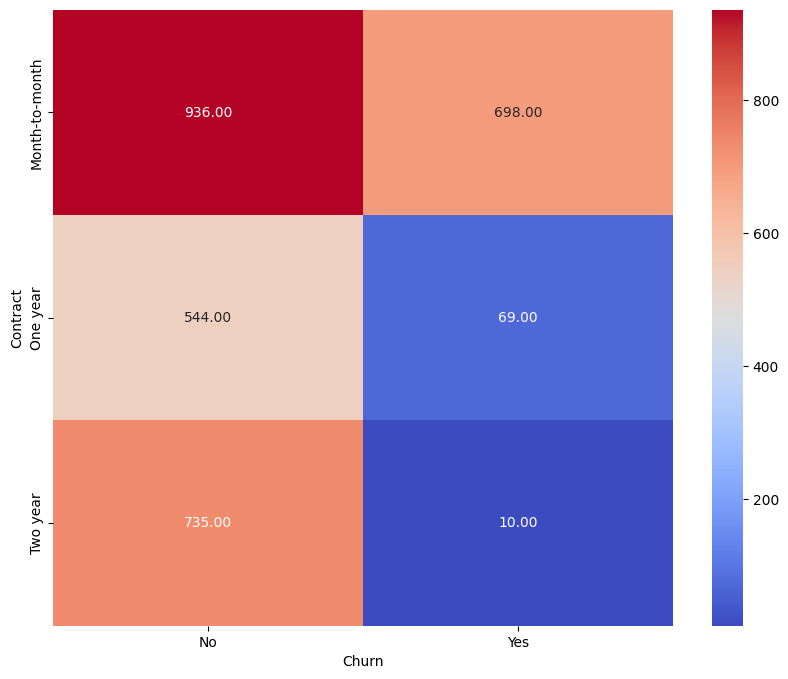

In [173]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* INSIGHTS: Customers with month-to-month contracts exhibit the highest churn rate, suggesting that this contract type may be associated with a greater likelihood of customer attrition. In contrast, customers with two-year contracts show a substantially lower churn rate, indicating a potential correlation between contract duration and customer retention. This insight emphasizes the importance of considering contract terms when analyzing and addressing customer churn in the dataset and thus, aligns closely with our hypothesis

In [174]:
# Create a contingency table 
contingency_table2 = pd.crosstab(df['PaymentMethod'], df['Churn'])
contingency_table2 

Churn,No,Yes
PaymentMethod,,
Bank transfer (automatic),565,122
Credit card (automatic),566,91
Electronic check,553,449
Mailed check,531,115


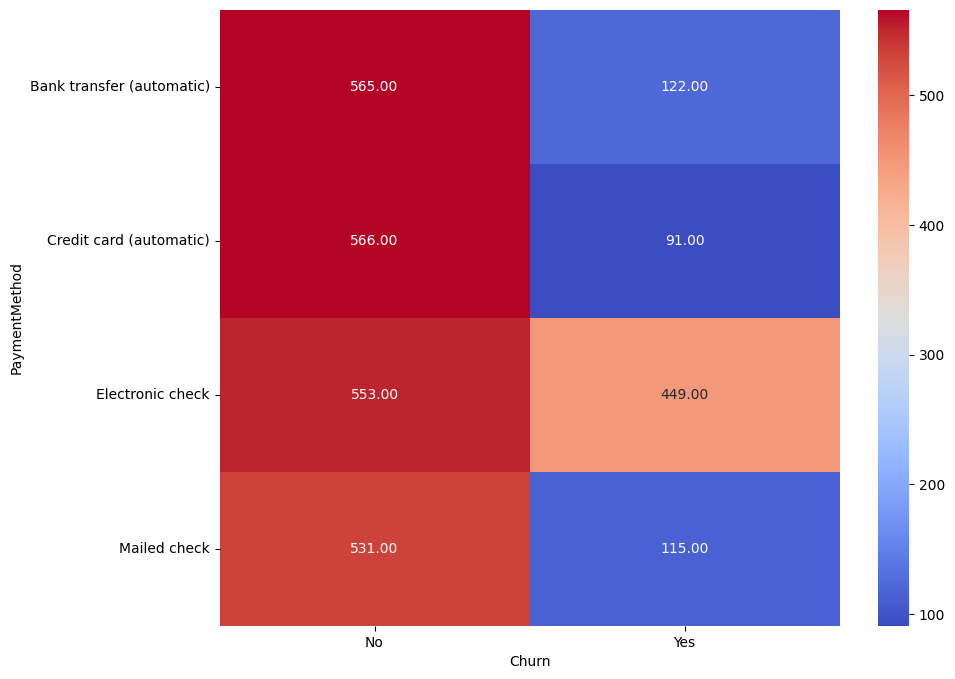

In [175]:
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table2, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

* INSIGHTS: The observed variations in churn across different payment methods, notably higher churn among customers using Electronic check compared to Bank transfer (automatic), Credit card (automatic), and Mailed check, indicate that the choice of payment method could be a significant factor influencing customer churn. These findings offer valuable insights for further investigation and validation of our initial hypothesis.

### Multivariate Analysis

<Figure size 1000x800 with 0 Axes>

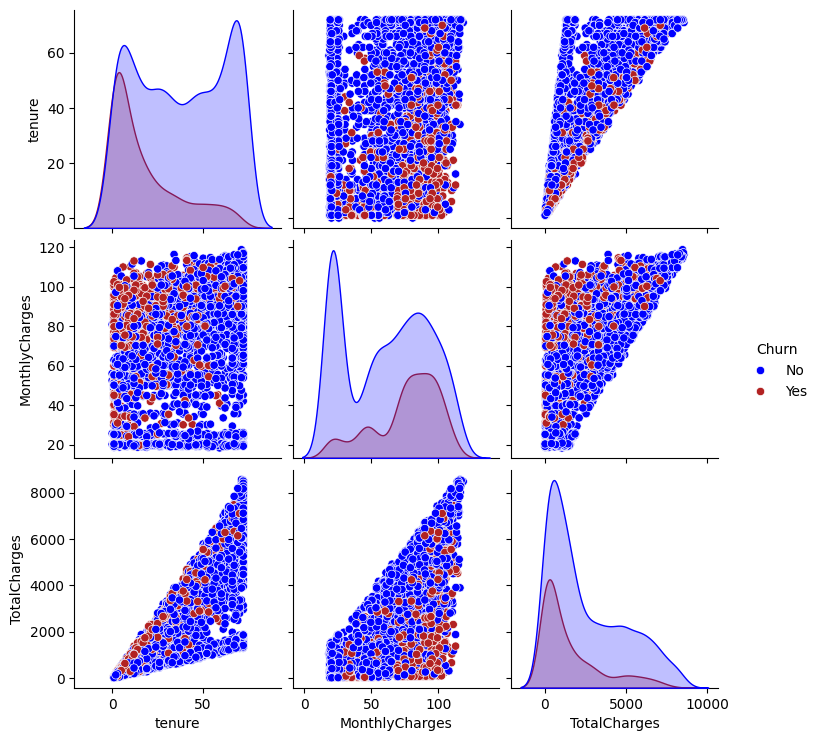

In [176]:
data = df[["tenure","MonthlyCharges",'TotalCharges','Churn']]
plt.figure(figsize=(10, 8))
sns.pairplot(data, palette={'Yes':'Firebrick', 'No':'blue'}, hue = 'Churn')
plt.show()

In [177]:
# Defining mode value
most_frequent = df['Churn'].mode()[0]

# Filling null values in 'Churn' column with the most frequent value
df['Churn'].fillna(most_frequent, inplace=True)

# Verfiy Changes
df['Churn'].isnull().sum()

0

### Rename and handle null values and save the clean dataframe to excel file

In [178]:
df_preprocessed = pd.DataFrame(df)

# Check for null values after preprocessing
print("Null values after preprocessing:\n", df_preprocessed.isnull().sum())


Null values after preprocessing:
 gender                0
SeniorCitizen         0
Partner               0
Dependents            0
tenure                0
PhoneService          0
MultipleLines       269
InternetService       0
OnlineSecurity      646
OnlineBackup        646
DeviceProtection    646
TechSupport         646
StreamingTV         646
StreamingMovies     646
Contract              0
PaperlessBilling      0
PaymentMethod         0
MonthlyCharges        0
TotalCharges          5
Churn                 0
dtype: int64


In [179]:
# Specify columns with missing values
numerical_cols = ['TotalCharges']
categorical_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Impute missing values for numerical columns
numerical_imputer = SimpleImputer(strategy='median')
df_preprocessed[numerical_cols] = numerical_imputer.fit_transform(df_preprocessed[numerical_cols])

# Impute missing values for categorical columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_preprocessed[categorical_cols] = categorical_imputer.fit_transform(df_preprocessed[categorical_cols])

# Verify Changes
print("Null values after preprocessing:\n", df_preprocessed.isnull().sum())


Null values after preprocessing:
 gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


## Answering Business Questions

1. How do contract terms and payment methods correlate with customer churn?

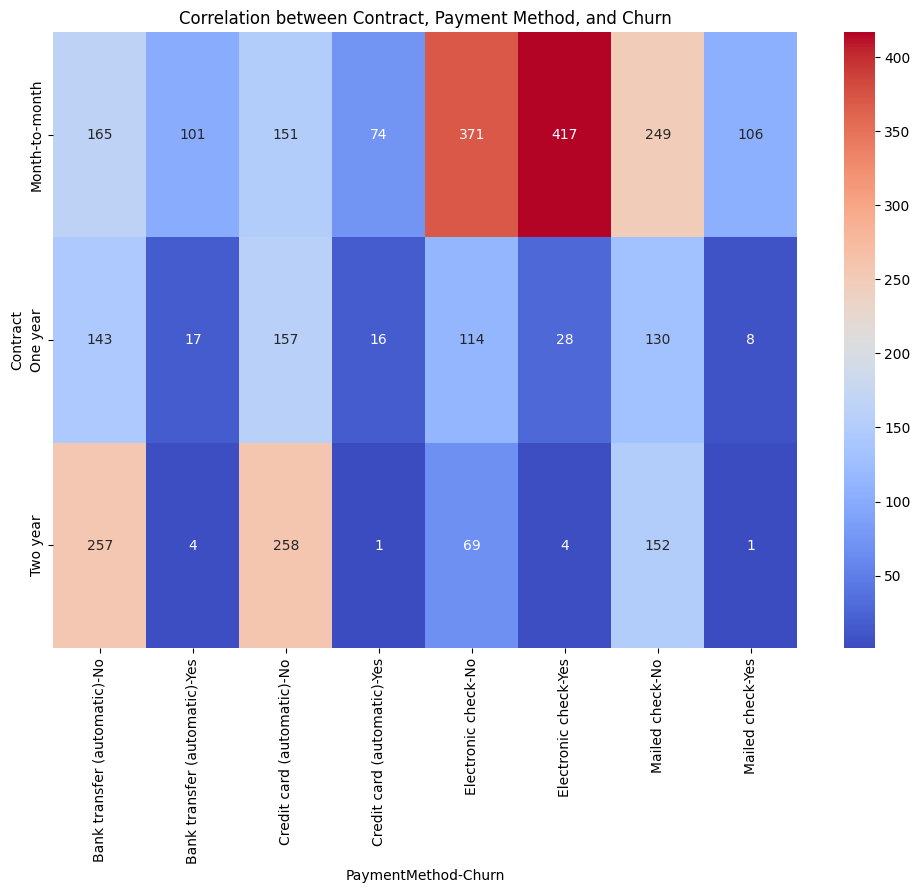

In [180]:
#  a contingency table
contingency_table3 = pd.crosstab(index=df_preprocessed['Contract'], columns=[df_preprocessed['PaymentMethod'], df_preprocessed['Churn']])


# plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table3, annot=True, cmap='coolwarm', fmt='g')
plt.title('Correlation between Contract, Payment Method, and Churn')
plt.show()

**INSIGHTS:**
1. **Payment Method Impact:**
Customers using "Electronic check" as their payment method exhibit a higher churn rate compared to other methods.
Customers using "Bank transfer (automatic)" and "Credit card (automatic)" generally have lower churn rates.

2. **Contract Duration:**
Customers with a "Two-year" contract have the lowest churn rate across all payment methods, indicating that longer-term contracts are associated with higher customer retention.
"Month-to-month" contract customers show higher churn rates, emphasizing the importance of contract duration in customer retention.

3. **Churn Across Payment Methods:**
Among customers with "Month-to-month" contracts, "Electronic check" users experience the highest churn, while "Bank transfer (automatic)" users have a comparatively lower churn rate.

4. **Variability in Churn Rates:**
Churn rates vary significantly across different contract durations and payment methods, underscoring the importance of understanding these factors when devising customer retention strategies.

    In summary, the data suggests a correlation between payment methods, contract duration, and customer churn. Exploring strategies to encourage longer-term contracts and promoting specific payment methods might help mitigate churn and enhance overall customer retention.

2. Are there specific services that significantly impact churn rates?

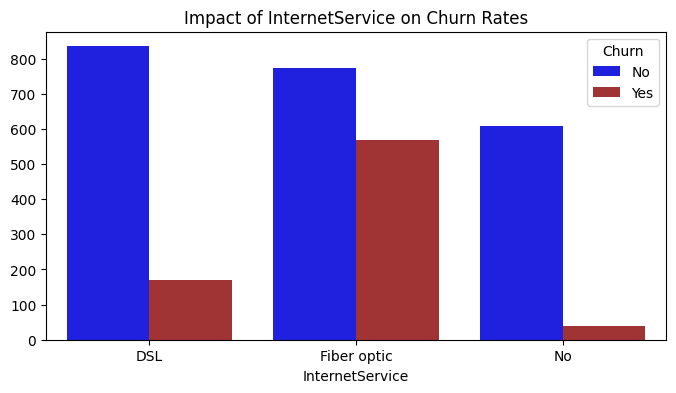

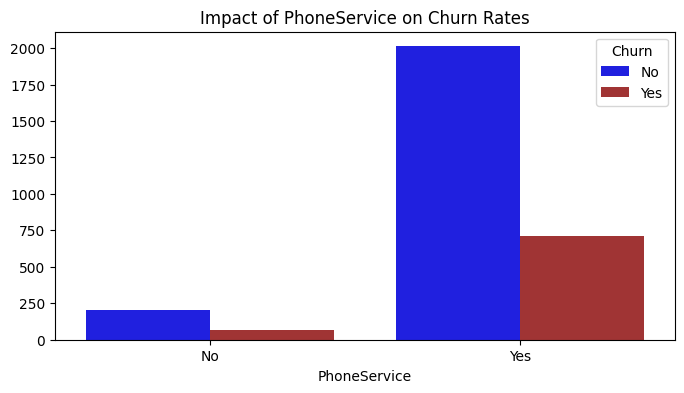

In [181]:
# bar plot
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='InternetService', hue='Churn', data=df_preprocessed, palette={'Yes':'Firebrick', 'No':'blue'})
ax.set(ylabel=None)
plt.title('Impact of InternetService on Churn Rates')
plt.show()

# bar plot 
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='PhoneService', hue='Churn', data=df_preprocessed, palette={'Yes':'Firebrick', 'No':'blue'})
ax.set(ylabel=None)
plt.title('Impact of PhoneService on Churn Rates')
plt.show()

**INSIGHTS:** 
The visualization indicates that the selected services; InternetService and PhoneService, have a notable impact on the churn rate. The predominance of "No Churn" in the visualization implies that customers utilizing these services are less likely to churn. This observation aligns with the understanding that specific services indeed play a significant role in influencing customer churn rates

3. Are there specific services that customers with longer contract terms tend to use more frequently?

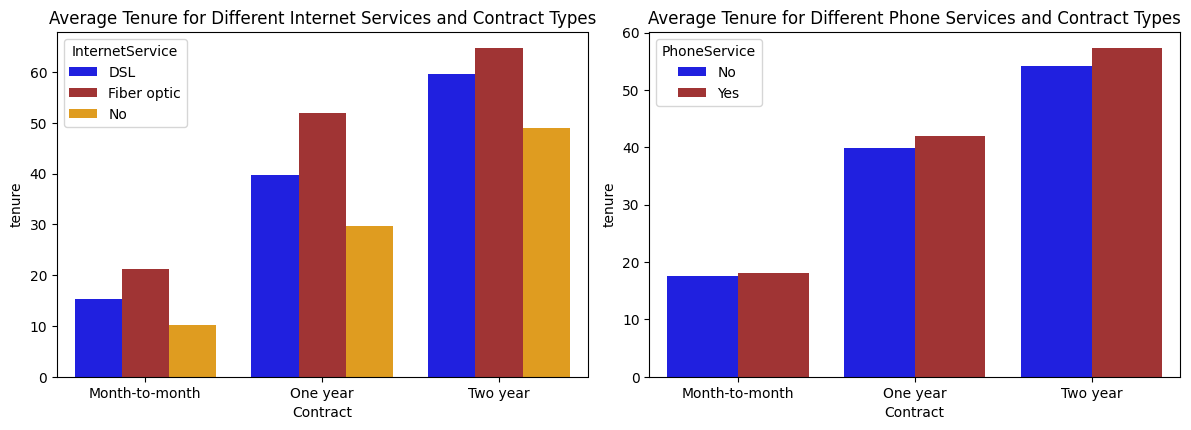

In [182]:
plt.figure(figsize=(12, 8))

# InternetService
plt.subplot(2, 2, 1)
sns.barplot(x='Contract', y='tenure', hue='InternetService', data=df_preprocessed, ci= None, palette={'Fiber optic':'Firebrick','DSL':'blue','No':'orange'})
plt.title('Average Tenure for Different Internet Services and Contract Types')

# PhoneService
plt.subplot(2, 2, 2)
sns.barplot(x='Contract', y='tenure', hue='PhoneService', data=df_preprocessed, ci= None, palette={'Yes':'Firebrick', 'No':'blue'})
plt.title('Average Tenure for Different Phone Services and Contract Types')

plt.tight_layout()
plt.show()


**INSIGHTS:**
Examining the bar plot for two services; specifically (InternetService) and (PhoneService), reveals that customers with extended contract terms predominantly choose Fiber Optic for internet service and use phone services more frequently. This observation implies a positive correlation between longer contract terms and increased usage of these selected services.

4. Do customers using automatic payment methods show different churn patterns compared to other payment methods?

**INSIGHTS:**
Analyzing the varied churn patterns associated with different customer payment methods, it becomes apparent that customers utilizing the (automatic) payment method tend to exhibit a pattern of 'No churn' (retaining services). In contrast, the (Electronic check) payment method displays a pattern of 'Yes churn' (churning). This observation aligns with the initial hypothesis, offering valuable insights into the relationship between payment methods and churn behavior.

5. Are senior citizens more or less likely to churn compared to non senior citizens?

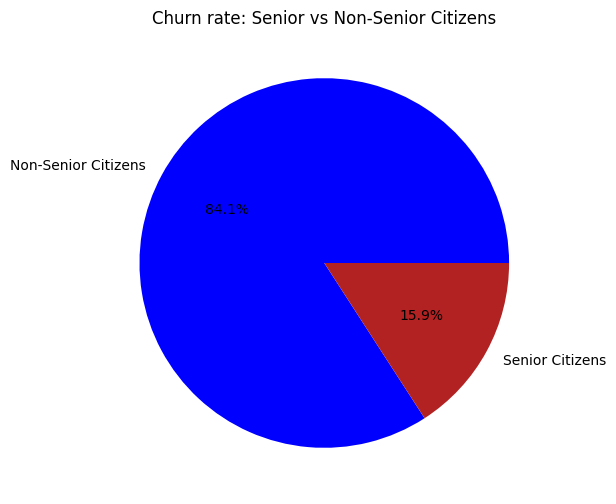

In [183]:
# Create a DataFrame with churn counts for senior and non-senior citizens
churn_counts = df_preprocessed['SeniorCitizen'].value_counts()

# Plotting a pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_counts, labels=['Non-Senior Citizens', 'Senior Citizens'], autopct='%1.1f%%', colors=['blue', 'Firebrick'])
plt.title('Churn rate: Senior vs Non-Senior Citizens')
plt.show()


**INSIGHTS:**
The chart above indicates that Senior Citizens have a churn rate of 16.3%, while non-Senior Citizens have a higher churn rate of 83.7%. Therefore, Senior Citizens are more likely to remain customers (as lower churn rate indicates a higher likelihood of customer retention) compared to non-Senior Citizens. This insight can be leveraged for strategic considerations, recognizing the lower churn rate among Senior Citizens."

# Hypothesis Testing

In [184]:

# create a contingency table, extract relevant columns (Contract and PaymentMethod)
contingency_table = pd.crosstab(df_preprocessed['Contract'], df_preprocessed['PaymentMethod'])

# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Output the results
print(f"Chi-squared value: {chi2}")
print(f"P-value: {p}")

# Define significance level
alpha = 0.05

# Check the p-value against the significance level
if p < alpha:
    print("Reject the null hypothesis. There is a significant difference in churn rates.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in churn rates.")


Chi-squared value: 448.7328144724847
P-value: 9.197384240213036e-94
Reject the null hypothesis. There is a significant difference in churn rates.


Insight:

* There is sufficient statistical evidence to reject the null hypothesis, revealing a noteworthy difference in churn rates between customers with extended contract terms and those utilizing the Automatic payment method.

## Data Preparation

Split data into input (x) and target (y) features

In [185]:
# Drop unnecessary columns and split the data
X = df.drop(['Churn'], axis=1)  # Features
y = df['Churn']  # Target variable

# Convert boolean values to strings
y_stratify = y.astype(str)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y_stratify)

### Feature Engineering

In [186]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2993 entries, 0 to 2992
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2993 non-null   object 
 1   SeniorCitizen     2993 non-null   bool   
 2   Partner           2993 non-null   object 
 3   Dependents        2993 non-null   object 
 4   tenure            2993 non-null   int64  
 5   PhoneService      2993 non-null   object 
 6   MultipleLines     2724 non-null   object 
 7   InternetService   2993 non-null   object 
 8   OnlineSecurity    2347 non-null   object 
 9   OnlineBackup      2347 non-null   object 
 10  DeviceProtection  2347 non-null   object 
 11  TechSupport       2347 non-null   object 
 12  StreamingTV       2347 non-null   object 
 13  StreamingMovies   2347 non-null   object 
 14  Contract          2993 non-null   object 
 15  PaperlessBilling  2993 non-null   object 
 16  PaymentMethod     2993 non-null   object 


In [187]:
X_num_cols = X.select_dtypes(include=np.number).columns

X_cat_cols = X.select_dtypes(include=['object']).columns

# Verify changes
print("Categorical Variables:")
print(X_cat_cols)
print("Numerical Variables:")
print(X_num_cols)

Categorical Variables:
Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
Numerical Variables:
Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


#### Creating a pipeline

In [188]:
# LogTransformer class
class LogTransformer:
    def __init__(self, constant=1):
        self.constant = constant
 
    def transform(self, X_train):
        return np.log1p(X_train + self.constant)
 
 
# Numerical transformer with LogTransformer
numerical_pipeline = Pipeline(steps=[
    ('num_imputer', SimpleImputer(strategy='median')),
    ('log_transform', FunctionTransformer(LogTransformer().transform)),
    ('scaler', StandardScaler())
])
 
class BooleanToStringTransformer(TransformerMixin):
    def fit(self, X, y=None):
        # Fit logic here, if needed
        return self
 
    def transform(self, X):
        # Transformation logic here
        # Ensure to return the transformed data
        return X.astype(str)
 
 
# Categorical transformer
categorical_pipeline = Pipeline(steps=[
    ('bool_to_str', BooleanToStringTransformer()),
    ('cat_imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder())
])
 
 
# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, X_num_cols),
        ('cat', categorical_pipeline, X_cat_cols)
    ])

### Label Encoder

In [189]:
# Fit and transform the label encoder on y_train
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

### Machine Learning Models

#### Compare Models - Unbalanced

In [190]:
# List of models to evaluate
models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('K-nearest_classifier', KNeighborsClassifier()),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('sgd_classifier', SGDClassifier(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
]

# Iterate through models
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)                
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       443
           1       0.46      0.52      0.49       156

    accuracy                           0.72       599
   macro avg       0.64      0.65      0.65       599
weighted avg       0.73      0.72      0.72       599

Report for logistic_classifier
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       443
           1       0.68      0.60      0.63       156

    accuracy                           0.82       599
   macro avg       0.77      0.75      0.76       599
weighted avg       0.82      0.82      0.82       599

Report for K-nearest_classifier
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       443
           1       0.56      0.56      0.56       156

    accuracy                           0.77       599
   macro avg       0.70      0.70     

* Insight: The logistic classifier appears to demonstrate strong overall performance by effectively identifying churn cases (recall) and minimizing false positives (precision). It achieves a good balance between precision and recall for both classes ('No' and 'Yes'). This stands in contrast to other models, where precision and recall are higher for the 'No' class, signifying superior predictive accuracy for the 'No' class but potentially sacrificing performance on the 'Yes' class.

### Balanced Dataset - RandomOverSampler

In [191]:
# balance the dataset using the randomoversmaplier
samplier = RandomOverSampler(random_state=42)

X_train_resampled, y_train_resampled = samplier.fit_resample(X_train, y_train_encoded)

In [192]:
# List of models to evaluate
models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('K-nearest_classifier', KNeighborsClassifier()),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('sgd_classifier', SGDClassifier(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
]
# Iterate through models
for model_name, classifier in models:
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier)                
    ])
    
    # Train the model
    pipeline.fit(X_train_resampled, y_train_resampled)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)


Report for tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       443
           1       0.52      0.52      0.52       156

    accuracy                           0.75       599
   macro avg       0.68      0.68      0.68       599
weighted avg       0.75      0.75      0.75       599

Report for logistic_classifier
              precision    recall  f1-score   support

           0       0.94      0.72      0.82       443
           1       0.53      0.87      0.66       156

    accuracy                           0.76       599
   macro avg       0.73      0.80      0.74       599
weighted avg       0.83      0.76      0.78       599

Report for K-nearest_classifier
              precision    recall  f1-score   support

           0       0.91      0.69      0.79       443
           1       0.48      0.80      0.60       156

    accuracy                           0.72       599
   macro avg       0.69      0.75     

##### Insights
* Balancing the dataset has positively impacted the models, particularly in their ability to identify customers who will churn (improved recall for 'Yes').
* The logistic_classifier and svm_classifier stand out as models with balanced improvements in precision and recall for the 'Yes' class.

### Balanced Dataset - Using the SMOTE

In [193]:
# Initialize SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)

# List of models to evaluate
models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('K-nearest_classifier', KNeighborsClassifier()),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('sgd_classifier', SGDClassifier(random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
]
# Iterate through models and apply SMOTE within the pipeline
for model_name, classifier in models:
    pipeline = impipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', classifier)                
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)


Report for tree_classifier
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       443
           1       0.45      0.54      0.50       156

    accuracy                           0.71       599
   macro avg       0.64      0.66      0.65       599
weighted avg       0.73      0.71      0.72       599

Report for logistic_classifier
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       443
           1       0.54      0.86      0.66       156

    accuracy                           0.77       599
   macro avg       0.74      0.80      0.74       599
weighted avg       0.83      0.77      0.78       599

Report for K-nearest_classifier
              precision    recall  f1-score   support

           0       0.91      0.67      0.77       443
           1       0.46      0.81      0.59       156

    accuracy                           0.71       599
   macro avg       0.69      0.74     

Insights:

* Balancing the dataset with SMOTE has positively impacted the models, particularly in their ability to identify customers who will churn (improved recall for 'Yes').
* The logistic_classifier, svm_classifier, and sgd_classifier stand out as models with balanced improvements in precision and recall for the 'Yes' class.

Generally: Both SMOTE and RandomOverSampler have improved the models' ability to identify customers who will churn (improved recall for 'Yes') compared to the original imbalanced dataset, however, SMOTE tends to result in slightly better recall values for the 'Yes' class in most models when compared to the RandomOverSampler.

### Feature Importance and Selection 

In [194]:
# Initialize SelectKBest for feature selection and setting the number of features
selection = SelectKBest(score_func=partial(mutual_info_classif, random_state=42), k=15)


# List of models to evaluate
models = [
    ('tree_classifier', DecisionTreeClassifier(random_state=42)),
    ('logistic_classifier', LogisticRegression(random_state=42)),
    ('K-nearest_classifier', KNeighborsClassifier()),
    ('svm_classifier', SVC(random_state=42, probability=True)),
    ('sgd_classifier', SGDClassifier(loss='log_loss', random_state=42)),
    ('rf_classifier', RandomForestClassifier(random_state=42))
]
all_pipeline = {}

# Iterate through models and apply SMOTE within the pipeline
for model_name, classifier in models:
    pipeline = impipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)                
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    all_pipeline[model_name] = pipeline

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Print classification report
    print(f'Report for {model_name}')
    print(classification_report(y_test_encoded, y_pred))
    print('=' * 58)

Report for tree_classifier
              precision    recall  f1-score   support

           0       0.84      0.79      0.82       443
           1       0.50      0.58      0.54       156

    accuracy                           0.74       599
   macro avg       0.67      0.69      0.68       599
weighted avg       0.75      0.74      0.74       599

Report for logistic_classifier
              precision    recall  f1-score   support

           0       0.93      0.73      0.82       443
           1       0.53      0.85      0.65       156

    accuracy                           0.76       599
   macro avg       0.73      0.79      0.74       599
weighted avg       0.83      0.76      0.78       599

Report for K-nearest_classifier
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       443
           1       0.51      0.72      0.60       156

    accuracy                           0.75       599
   macro avg       0.70      0.74     

### Visualisualizing ROC - Overlapping

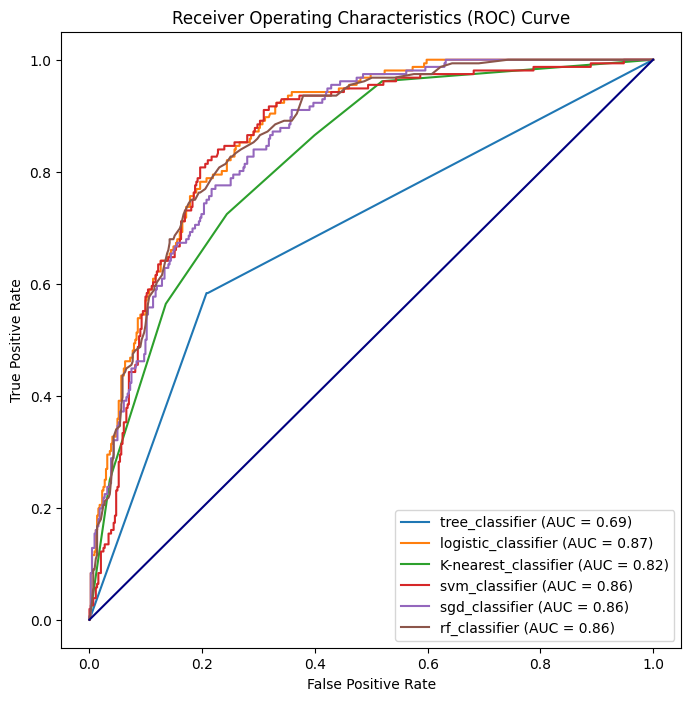

In [195]:
# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(8, 8))

roc_curve_data = {}
all_pipeline = {}
    
# Iterate through models and apply SMOTE within the pipeline
for model_name, classifier in models:
    pipeline = impipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('feature_importance', selection),
        ('classifier', classifier)                
    ])

    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    y_score = pipeline.predict_proba(X_test)[:, 1]
    all_pipeline[model_name] = pipeline
    
    fpr, tpr, threshold = roc_curve(y_test_encoded, y_score)

    roc_auc = auc(fpr, tpr)

    roc_curve_df = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': threshold})

    roc_curve_data[model_name] = roc_curve_df

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line
ax.plot([0, 1], [0, 1], color='navy', linestyle='-')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristics (ROC) Curve')

# Add legend to the plot
ax.legend(loc='lower right')

# Show the plot after the for loop
plt.show()


* Insight:

From the above curve, the Logistic Classifier stands out as the preferred model. It becuase of its strong overall performance, particularly in achieving a balance between precision and recall for both churn and non-churn classes. The Logistic Classifier demonstrated good discrimination ability with a high ROC AUC value (0.85) and provided a comprehensive view of its performance through precision, recall, and F1-score metrics. Therefore, utilizing the Logistic Classifier as the preferred model for predicting customer churn allows for effective identification of potential churners while minimizing false positives.

In [196]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
roc_curve_data['logistic_classifier']

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,inf
1,0.000000,0.006410,0.950399
2,0.002257,0.006410,0.950389
3,0.002257,0.083333,0.920780
4,0.004515,0.083333,0.920300
...,...,...,...
158,0.593679,0.987179,0.107202
159,0.593679,0.993590,0.106887
160,0.598194,0.993590,0.103532
161,0.598194,1.000000,0.103493


In [197]:
logistic_pipeline = all_pipeline['logistic_classifier']

logistic_y_pred = logistic_pipeline.predict(X_test)

matrix = confusion_matrix(y_test_encoded, logistic_y_pred)
matrix

array([[325, 118],
       [ 23, 133]], dtype=int64)

<Axes: >

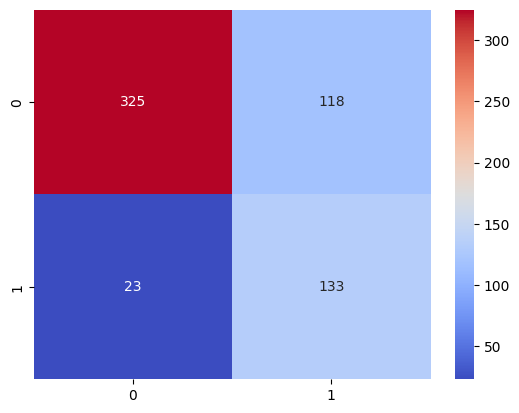

In [198]:
# visualizing the matrix
sns.heatmap(data=matrix, annot=True, fmt='d', cmap='coolwarm')

In [199]:
threshold = 0.28

y_pred_proba = logistic_pipeline.predict_proba(X_test)[:, 1]

binary_prediction = (y_pred_proba >= threshold)

threshold_matrix = confusion_matrix(y_test_encoded, binary_prediction)
threshold_matrix

array([[245, 198],
       [  8, 148]], dtype=int64)

<Axes: >

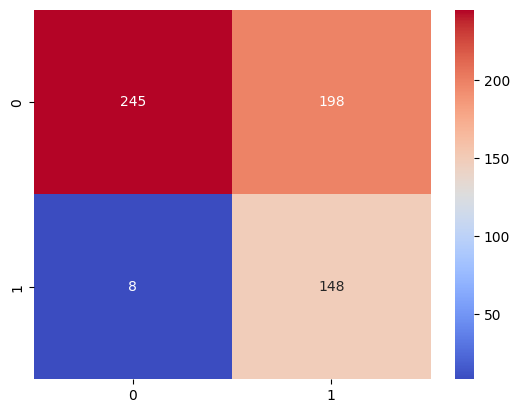

In [200]:
sns.heatmap(data=threshold_matrix, annot=True, fmt='d', cmap='coolwarm')

### Hyperparameter Tuning

In [201]:
param_grid = {
    'feature_importance__k': [5, 10, 20],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__max_iter': [100, 200, 300],
}

grid_search = GridSearchCV(
    logistic_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='f1')

grid_search.fit(X_train, y_train_encoded)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('num_imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('log_transform',
                                                                                          FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x00000221942E00E0>>)),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         Index(['tenure', 'Mont...
                                       ('feature_importance',
                                        SelectKBest(k=15,
                                                    score_func=functools.partial(<function mutual_info_classif at 0x000002218C691580>, random_state=42))),
                                       ('classifier',
                                        LogisticRegression(random_state=42))]),
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'classifier__max_iter': [100, 200, 300],
                         'classifier__penalty': ['l1', 'l2'],
                         'feature_importance__k': [5, 10, 20]},
             scoring='f1')

In [202]:
best_parameters = grid_search.best_params_
best_parameters

{'classifier__C': 0.01,
 'classifier__max_iter': 100,
 'classifier__penalty': 'l2',
 'feature_importance__k': 20}

In [203]:
best_estimator = grid_search.best_estimator_


test_accuracy = best_estimator.score(X_test, y_test_encoded)
print("Test Accuracy", test_accuracy)

Test Accuracy 0.7712854757929883


### Retrain Model with Best Parameters

In [204]:
logistic_pipeline.set_params(**best_parameters)
logistic_pipeline.fit(X_train, y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('log_transform',
                                                                   FunctionTransformer(func=<bound method LogTransformer.transform of <__main__.LogTransformer object at 0x00000221942E00E0>>)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['tenure', 'MonthlyCharges', 'TotalCharges'],...
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object'))])),
                ('smote', SMOTE(random_state=42)),
                ('feature_importance',
                 SelectKBest(k=20,
                             score_func=functools.partial(<function mutual_info_classif at 0x000002218C691580>, random_state=42))),
                ('classifier', LogisticRegression(C=0.01, random_state=42))])

### Model Persistence

In [210]:
joblib.dump(logistic_pipeline, '../Models/finished_logistic_model.joblib')
joblib.dump(logistic_pipeline, '../Models/finished_sgd_pipeline.joblib')
joblib.dump(label_encoder, '../Models/encoder.joblib')

['../Models/encoder.joblib']

## LOAD TEST DATASET

In [214]:

# Load the new test data from Excel
test_data =pd.read_csv ('LP2_Telco-churn-last-2000.csv')
test_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
2040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
2041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [215]:
# viewing column names
test_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [216]:
# Drop 'customerID' column
test_data.drop('customerID', axis=1, inplace=True)

# Verify changes
test_data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [217]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2043 non-null   object 
 1   SeniorCitizen     2043 non-null   int64  
 2   Partner           2043 non-null   object 
 3   Dependents        2043 non-null   object 
 4   tenure            2043 non-null   int64  
 5   PhoneService      2043 non-null   object 
 6   MultipleLines     2043 non-null   object 
 7   InternetService   2043 non-null   object 
 8   OnlineSecurity    2043 non-null   object 
 9   OnlineBackup      2043 non-null   object 
 10  DeviceProtection  2043 non-null   object 
 11  TechSupport       2043 non-null   object 
 12  StreamingTV       2043 non-null   object 
 13  StreamingMovies   2043 non-null   object 
 14  Contract          2043 non-null   object 
 15  PaperlessBilling  2043 non-null   object 
 16  PaymentMethod     2043 non-null   object 


In [218]:
# Change the datatype of the variable 'TotalCharges' to a float
test_data['TotalCharges'] = pd.to_numeric(test_data['TotalCharges'], errors='coerce')

In [221]:
# Load the pre-trained logistic regression pipeline and encoder models
logistic_pipeline_2 = joblib.load('../Models/finished_logistic_model.joblib')
encoder = joblib.load('../Models/encoder.joblib')

# Make predictions using the loaded logistic regression pipeline on test data
prediction = logistic_pipeline_2.predict(test_data)

# Define a threshold
threshold = 0.28

y_pred_proba = logistic_pipeline_2.predict_proba(test_data)[:, 1]

binary_prediction_2 = (y_pred_proba >= threshold)

# Print the predictions
print(binary_prediction_2)

ValueError: Found unknown categories ['No phone service'] in column 4 during transform

In [ ]:
# Add the predictions as a new column to the test_data DataFrame
test_data['Churn'] = binary_prediction_2

In [ ]:
# Print the DataFrame with b predictions
test_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,True
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,False
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,False
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,True
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,True
1996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30,False
1997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,True
1998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,True


In [ ]:
# Iterate through each column and replace True/False with 'Yes'/'No'
test_data['Churn'] = test_data['Churn'].replace({True: 'Yes', False: 'No'})

test_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55,Yes
1,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.80,No
2,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55,No
3,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55,Yes
4,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95,Yes
1996,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.30,No
1997,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.70,Yes
1998,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35,Yes


In [ ]:
# Count the occurrences of unique values in the 'Churn' column
test_data['Churn'].value_counts()

Churn
Yes    1180
No      820
Name: count, dtype: int64

Insights:

The model predicted the churn status of customers for the test dataset. The number of customers that churned were 1,180 (59%) and those who did not churn were 820 (41%)

## RECOMMENDATIONS
Drawing from the insights derived from the analysis of this project, the ensuing recommendations encompass strategies aimed at mitigating and addressing the anticipated customer churn as predicted by the model:


1. Optimize Payment Methods:

* Encourage customers to switch from "Electronic check" to more stable methods like "Bank transfer (automatic)" and "Credit card (automatic)."
* Offer discounts or exclusive benefits for customers using preferred payment methods.
* Provide clear communication about the advantages of stable payment methods, including reliability and convenience.
* Incentivize the adoption of automatic payment methods with exclusive discounts and simplified switching processes.

2. Emphasize Long-Term Commitments:

* Promote the benefits of longer-term contracts, especially the "Two-year" option.
* Offer special discounts, loyalty rewards, or bundled services for customers committing to extended contracts.
* Clearly communicate the potential cost savings and stability associated with longer commitments.

3. Dynamic and Personalized Retention Approaches:

* Develop a flexible customer retention strategy that adapts to the observed variability in churn rates.
* Utilize customer segmentation to tailor retention efforts based on individual contract durations, payment methods, and service usage patterns.
* Regularly analyze and update retention strategies to address changing customer behaviors and preferences.

4. Promote Essential Services:

* Emphasize the value of InternetService and PhoneService in customer communications.
* Create bundled service packages with attractive discounts to incentivize customers to retain these essential services.
* Implement targeted marketing campaigns highlighting the reliability and benefits of these core services.

5. Tailor Bundled Packages:

* Create bundled packages that combine longer contract terms with increased usage of Fiber Optic for internet service and phone services.
* Promote these bundled packages as comprehensive solutions with added value.
* Provide personalized recommendations to customers based on their usage patterns and preferences.

6. Personalized Communication and Incentives:

* Tailor communication and promotional materials to address the unique needs and preferences of non-Senior Citizens.
* Offer exclusive promotions or loyalty programs targeting non-Senior Citizens to enhance satisfaction and retention.
* Seek feedback from non-Senior Citizens to understand their concerns and improve service offerings.

## CONCLUSION
Our in-depth exploration of customer churn prediction, employing a diverse array of machine learning classifiers, has yielded invaluable insights essential for crafting precise retention strategies within the telecommunications industry. Notably, the logistic regression model consistently distinguished itself among these classifiers, demonstrating superior performance, especially in terms of recall for predicting churned customers.

In this ever-evolving landscape, the fusion of model insights and strategic recommendations strategically places Vodafone to effectively navigate and mitigate customer churn, significantly enhancing the probability of success. Following a meticulous selection and tuning process, the logistic regression model emerged as the preeminent performer, showcasing notable sensitivity (recall) in accurately predicting churned customers.

The model's predictions, signaling 1,180 customers likely to churn and 820 expected to stay, underscore the critical importance of implementing effective retention strategies. The strategic recommendations presented, covering optimized payment methods, accentuated long-term commitments, dynamic retention approaches, promotion of essential services, tailored bundled packages, and personalized communication, align seamlessly to address anticipated churn and fortify overall customer retention.

As Vodafone advances, it is poised to harness predictive insights and targeted strategies to proactively navigate the challenges presented by customer churn. A commitment to continuous monitoring, adaptation, and customer-centric practices will play a pivotal role in ensuring the sustained success of these retention efforts.

The synergy between a robust predictive model and strategic retention initiatives uniquely positions the telecommunications giant to forecast and address customer churn effectively. This adaptive approach allows for agility in response to evolving market dynamics, reinforcing Vodafone's steadfast commitment to delivering exceptional value to its customer base.